In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline

In [32]:
news = fetch_20newsgroups()

In [33]:
X = pd.Series(news.data, name="article")
y = pd.Series(pd.Categorical.from_codes(news.target, news.target_names))

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [34]:
naive_bayes = make_pipeline(TfidfVectorizer(), MultinomialNB())
naive_bayes.fit(X_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [35]:
predictions = naive_bayes.predict(X_test)

Text(0.5, 103.73999999999997, 'Predicted categories')

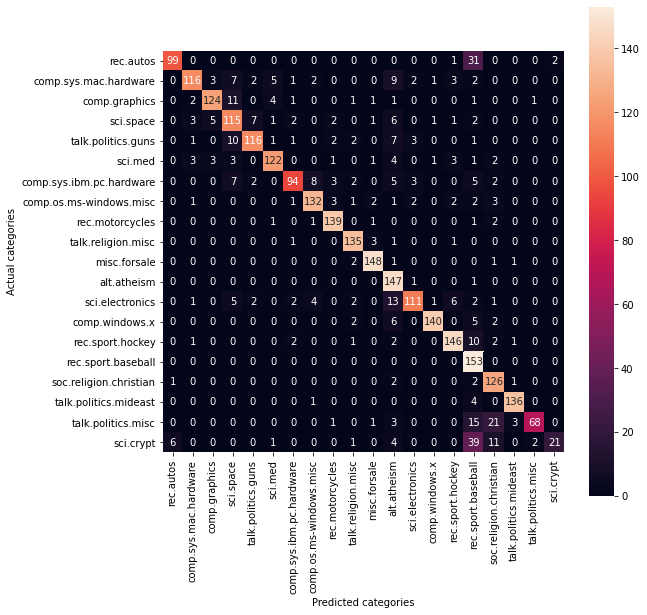

In [38]:
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(9, 9))
sns.heatmap(cm, square=True, annot=True, fmt="d", xticklabels=y.unique(), yticklabels=y.unique())
plt.ylabel("Actual categories")
plt.xlabel("Predicted categories")

In [39]:
accuracy_score(y_test, predictions)

0.8441145281018028

In [49]:
def predict_category(s, model=naive_bayes):
    pred = model.predict([s])
    return pred[0]

In [62]:
predict_category("Jesus Christ")

'soc.religion.christian'

In [65]:
predict_category("President of Portugal")

'talk.politics.misc'

In [66]:
predict_category("International Space Station")

'sci.space'

In [67]:
predict_category("BMW is better than Audi")

'rec.autos'